# This Notebook Contains HW4, Exercise 2

In [1]:
import pickle
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from random import choice
%matplotlib inline

On the course website (along with this notebook), you will find two .pickle files, "mysteryA.pickle" and "mysteryB.pickle".  

### Put both .pickle files in the same directory as this notebook,
and then run the cell below to load them.  (Don't worry about the python syntax here).

In [2]:
def makeFn(dic):
    def f(x): return dic[x]
    return f
A = [ makeFn(d) for d in pickle.load(open("mysteryA.pickle", "rb")) ]
B = [ makeFn(d) for d in pickle.load(open("mysteryB.pickle", "rb")) ]

Each of A and B are hash families, which contain functions from the universe {0,...,21} to three buckets, {0,1,2}.

More precisely, A and B are lists of functions.

In [3]:
# Here's an example which shows that A[4] is a function.  It's the 4th function in the hash family.
f = A[4]
print("Now f is a function:")
print("f=", f)
print("And we can evaluate f on the inputs {0,...,21}.  For example, f(17)=", f(17))

Now f is a function:
f= <function makeFn.<locals>.f at 0x10bc97b70>
And we can evaluate f on the inputs {0,...,21}.  For example, f(17)= 0


### A and B have a lot of things in common:

In [4]:
# They both have 506 functions in them.
print(len(A))
print(len(B))

506
506


In [5]:
# Further, for any given x in {0,...,21}, the probability that x lands in any given bucket seems pretty flat:
def generateHistogram(x):
    A_output_on_x = [ h(x) for h in A ]  # this is a list of the values h(x) as h varies over the hash family A.
    B_output_on_x = [ h(x) for h in B ]  # this is a list of the values h(x) as h varies over the hash family B.
    counts, bins, patches = plt.hist([A_output_on_x, B_output_on_x], color=["orange","blue"] , label=["A", "B"], bins=3)
    plt.legend()  # this draws the legend
    plt.xticks(bins)  # this says where to put tick marks; I want it on the bin dividers
    plt.xlabel("Buckets")  # label on x-axis
    plt.ylabel("Number of h's so that h(" + str(x) + ") lands in this bucket") # label on y-axis
    plt.title("How spread out are the images of " + str(x) + "?")  # plot title
    plt.show()  # displays the plot

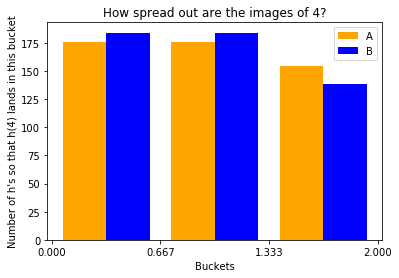

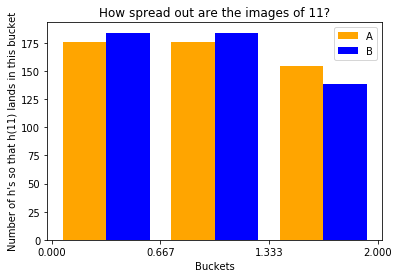

In [6]:
generateHistogram(4)
generateHistogram(11)

## However, one of these families is a pretty good universal hash family, and one is pretty bad.

# Exercise: which is which?
You should turn in your answer, along with compelling numerical evidence, which you present along with an explanation of what your evidence has to do with the definition of a universal hash family.

Your evidence should use the functions in A and B as black boxes.  Please do not try to reverse-engineer the functions. :)

If you use a histogram in your answer, you may see above for an example of how to plot one in Python.

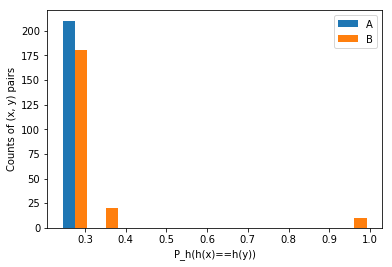

In [24]:
def findP(A):
  outA = []
  for x in range(20):
    for y in range(x+1, 21):
      tot, cnt = 0, 0
      for h in A:
        tot += 1
        if h(x)==h(y):
          cnt += 1
      outA.append(cnt/tot)
      #print(outA[-1])
  #print(len(outA), '\n'*10)
  return outA
outA = findP(A)
outB = findP(B)
plt.hist([outA, outB], label=["A", "B"])
plt.xlabel("P_h(h(x)==h(y))")
plt.ylabel("Counts of (x, y) pairs")
plt.legend()
plt.show()